# Test API Notebook
This notebook allows you to run requests on the api using python code. You can send a basic get request to confirm the server is running and test the websocket for both entity extraction (from screenshot) and research entities (with MultiOn API).

### Test Get Request

In [1]:
# Test basic get request
import requests

def test_get_request():
    response = requests.get("http://0.0.0.0:3000")
    print(response)
    assert response.status_code == 200
    assert response.json() == {"message": "Welcome to the API"}
test_get_request()

<Response [200]>


### Define Webhook Functions

In [2]:
import asyncio
import nest_asyncio
import websockets
import json
import base64
from PIL import Image
import io

nest_asyncio.apply()

async def call_webhook(message):
    uri = "ws://0.0.0.0:3000/ws"

    async with websockets.connect(uri) as websocket:
        print("Connected to the WebSocket server")

        # Send a message
        await websocket.send(json.dumps(message))
        print("Message sent to the server")

        # Receive a response
        while True:
            try:
                response = await websocket.recv()
                print(f"Received response from server: {response}")
            except websockets.ConnectionClosed:
                print("Connection closed")
                break

### Test Entity Extraction

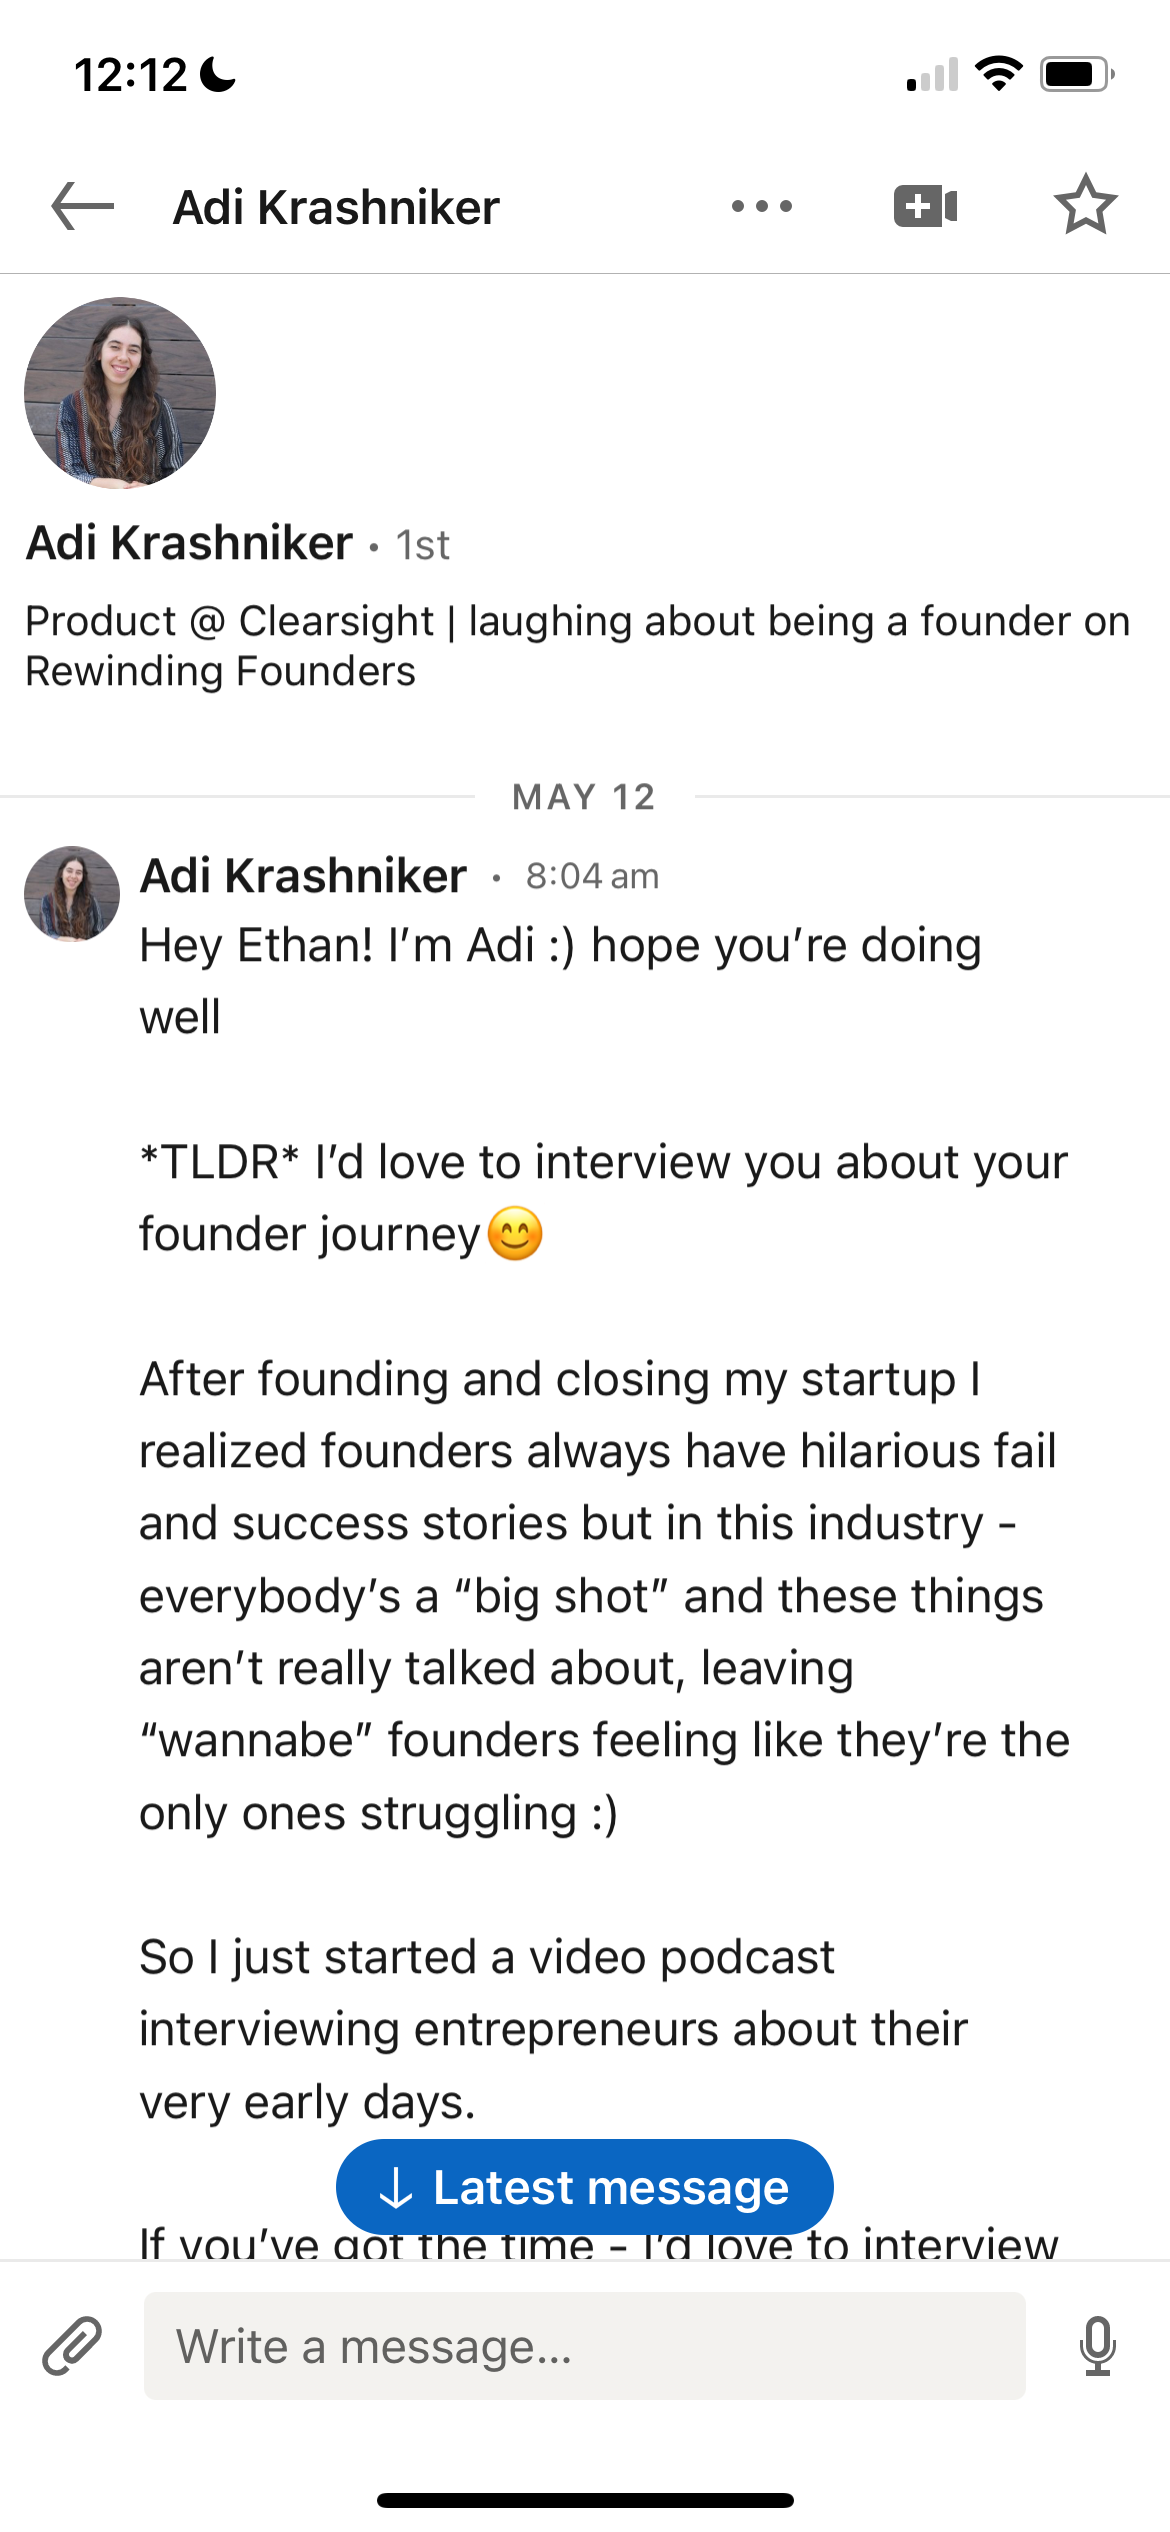

In [3]:
# View image
from IPython.display import Image, display

image_file_path = './examples/linkedin1.png'

with open(image_file_path, "rb") as image_file:
    image_data = base64.b64encode(image_file.read()).decode('utf-8')

display(Image(filename=image_file_path, width=300))

In [4]:
# Create the JSON message
message = {
    "task": "extract entities",
    "image": image_data
}

# Run on Websocket API
asyncio.get_event_loop().run_until_complete(call_webhook(message))

Connected to the WebSocket server
Message sent to the server
Received response from server: Starting extract entities
Received response from server: {"entity":{"name":"Adi Krashniker","category":"person"}}
Received response from server: Extract entities finished
Received response from server: Disconnected
Connection closed


### Test Research Person

In [5]:
message = {
    "task": "research entity",
    "entity": {
        "name": "Adi Krashniker",
        "category": "person"
    }
}

# Run on Websocket API
asyncio.get_event_loop().run_until_complete(call_webhook(message))

Connected to the WebSocket server
Message sent to the server
Received response from server: Starting research entity
Received response from server: {"step":1,"max_steps":12}
Received response from server: {"step":2,"max_steps":12}
Received response from server: {"step":3,"max_steps":12}
Received response from server: {"step":4,"max_steps":12}
Received response from server: {"step":5,"max_steps":12}
Received response from server: {"step":6,"max_steps":12}
Received response from server: {"step":7,"max_steps":12}
Received response from server: {"step":8,"max_steps":12}
Received response from server: {"step":9,"max_steps":12}
Received response from server: {"step":10,"max_steps":12}
Received response from server: {"step":11,"max_steps":12}
Received response from server: {"step":12,"max_steps":12}
Received response from server: Summary
Adi Krashniker is a Product Manager at Adelante CX and a co-founder of the startup Homies. He is based in Tel Aviv, Israel.

Work Experience
- Product Manage

### Test Research Company

In [ ]:
message = {
    "task": "research entity",
    "entity": {
        "name": "Wyoming Balloon Company",
        "category": "company"
    }
}

# Run on Websocket API
asyncio.get_event_loop().run_until_complete(call_webhook(message))